In [1]:
import pandas as pd
import numpy as np
from parametros import *
import sys, os
sys.path.append(os.path.join(os.path.dirname(file), "..", ".."))
from prepro_py import preprocesamiento_naive
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.naive_bayes import CategoricalNB
os.chdir("../../../../")

In [2]:
to_csv = False
return_something = True
feature_selection = False
seek_correlation = None

In [3]:
y_data_style = "h1n1"
x_data, y_data, test = preprocesamiento_naive(
    PAHT_OUTPUT,
    features_keep=features_keep,
    features_drop=features_drop,
    y_data_style=y_data_style,
    features_NA_as_cat=features_NA_as_cat,
    imputation_method=imputation_method,
    n_estimators=n_estimators,
    criterion=criterion,
    feature_selection=feature_selection,
    seek_correlation=seek_correlation,
    to_csv=to_csv,
    return_something=return_something,
    sc_max_depth=sc_max_depth,
    print_cor=print_cor,
    value=1000,
    sampling=sampling
    )

Hay 26707 filas y 19642 no tienen NaN
Hay 26708 filas y 19592 no tienen NaN


In [4]:
y_data = pd.read_csv("data/training_set_labels_4.csv")

In [5]:
y_data

,Y
0,4
1,3
2,4
3,3
4,4
...,...
26702,4
26703,4
26704,3
26705,4


In [6]:
x_data.drop("respondent_id", axis=1, inplace=True)

In [8]:
f_selector = SFS(
    CategoricalNB(),
    k_features=x_data.shape[1], 
    forward=True, 
    floating=False, 
    verbose=2,
    cv=5
    )
f_selector.fit(x_data, np.array(y_data).ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.8s finished

[2022-01-14 18:27:16] Features: 1/35 -- score: 0.5592544090202793[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    2.7s finished

[2022-01-14 18:27:19] Features: 2/35 -- score: 0.5969973315922944[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    3.0s finished

[2022-01-14 18:27:22] Features: 3/35 -- score: 0.6161681659738798[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(estimator=CategoricalNB(), k_features=35, verbose=2)

In [9]:
values = pd.DataFrame.from_dict(f_selector.get_metric_dict()).T
values

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(18,)","[0.5548483713964807, 0.5561587420441783, 0.555...",0.559254,"(opinion_seas_vacc_effective,)",0.005838,0.004542,0.002271
2,"(9, 18)","[0.5949082740546612, 0.5913515537251965, 0.596...",0.596997,"(doctor_recc_h1n1, opinion_seas_vacc_effective)",0.00804,0.006255,0.003128
3,"(9, 18, 21)","[0.6136278547360539, 0.6154998128041932, 0.616...",0.616168,"(doctor_recc_h1n1, opinion_seas_vacc_effective...",0.002568,0.001998,0.000999
4,"(9, 18, 19, 21)","[0.6383377012354923, 0.6257955821789591, 0.634...",0.635414,"(doctor_recc_h1n1, opinion_seas_vacc_effective...",0.008259,0.006426,0.003213
5,"(9, 10, 18, 19, 21)","[0.6488206664170723, 0.6388992886559341, 0.645...",0.646759,"(doctor_recc_h1n1, doctor_recc_seasonal, opini...",0.006443,0.005013,0.002506
6,"(9, 10, 18, 19, 21, 23)","[0.654623736428304, 0.6433919880194684, 0.6491...",0.64953,"(doctor_recc_h1n1, doctor_recc_seasonal, opini...",0.005991,0.004661,0.002331
7,"(9, 10, 14, 18, 19, 21, 23)","[0.6533133657806065, 0.6458255335080494, 0.651...",0.651327,"(doctor_recc_h1n1, doctor_recc_seasonal, healt...",0.004009,0.003119,0.00156
8,"(9, 10, 14, 18, 19, 21, 23, 34)","[0.6639835267690004, 0.6538749532010483, 0.656...",0.658816,"(doctor_recc_h1n1, doctor_recc_seasonal, healt...",0.005165,0.004019,0.002009
9,"(9, 10, 13, 14, 18, 19, 21, 23, 34)","[0.6662298764507675, 0.6561213028828154, 0.659...",0.662635,"(doctor_recc_h1n1, doctor_recc_seasonal, healt...",0.00571,0.004442,0.002221
10,"(9, 10, 13, 14, 18, 19, 20, 21, 23, 34)","[0.6690378135529764, 0.6576188693373268, 0.662...",0.664582,"(doctor_recc_h1n1, doctor_recc_seasonal, healt...",0.00568,0.004419,0.00221


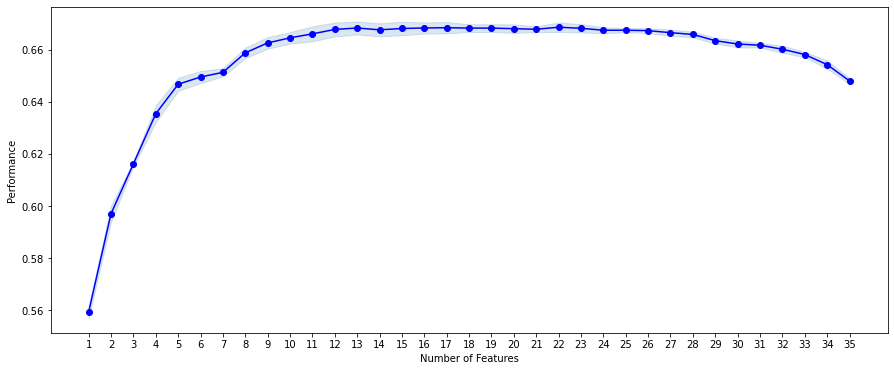

In [10]:
fig = plot_sfs(f_selector.get_metric_dict(), kind='std_err', figsize=(15,6))

In [11]:
x_data.columns.values[[values.feature_idx[13]]]

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_12560/3693307271.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x_data.columns.values[[values.feature_idx[13]]]


array(['behavioral_antiviral_meds', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'race', 'rent_or_own', 'employment_occupation'], dtype=object)